2025-05-04 00:16:53.108 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label             1472 non-null   object
 1   Brand             1472 non-null   object
 2   Name              1472 non-null   object
 3   Ingredients       1472 non-null   object
 4   Oily              1472 non-null   bool  
 5   Dry               1472 non-null   bool  
 6   Sensitive         1472 non-null   bool  
 7   Combination       1472 non-null   bool  
 8   Normal            1472 non-null   bool  
 9   Alcohol-Free      1472 non-null   bool  
 10  Fungal Acne Safe  1472 non-null   bool  
 11  Acne-Prone Safe   1472 non-null   bool  
dtypes: bool(8), object(4)
memory usage: 57.6+ KB
None
Valeurs manquantes par colonne :
Label               0
Brand               0
Name                0
Ingredients         0
Oily                0
Dry                 0
Sensitive           0
Combina

2025-05-04 00:16:53.656 
  command:

    streamlit run /opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-04 00:16:53.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/var/folders/4g/gggly1wn3mn9t5sb5dycc81c0000gn/T/ipykernel_9877/406705186.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_categories.index, y=df_categories.values, palette="Set2")


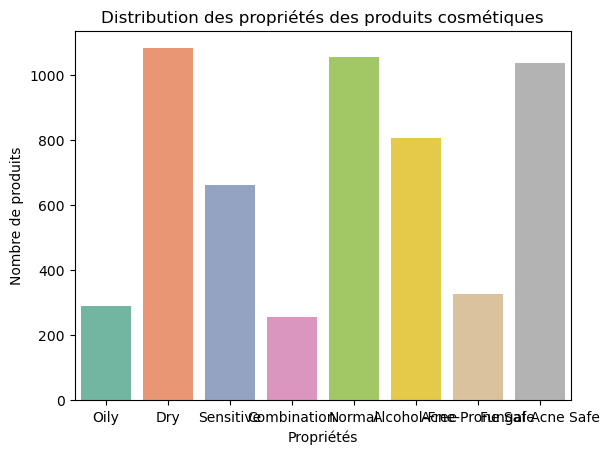

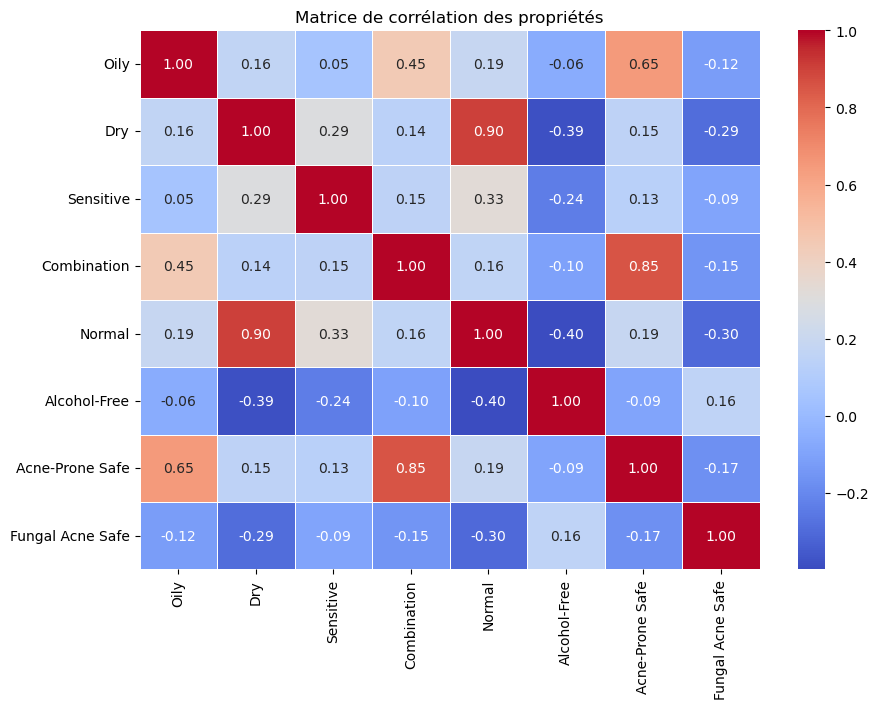

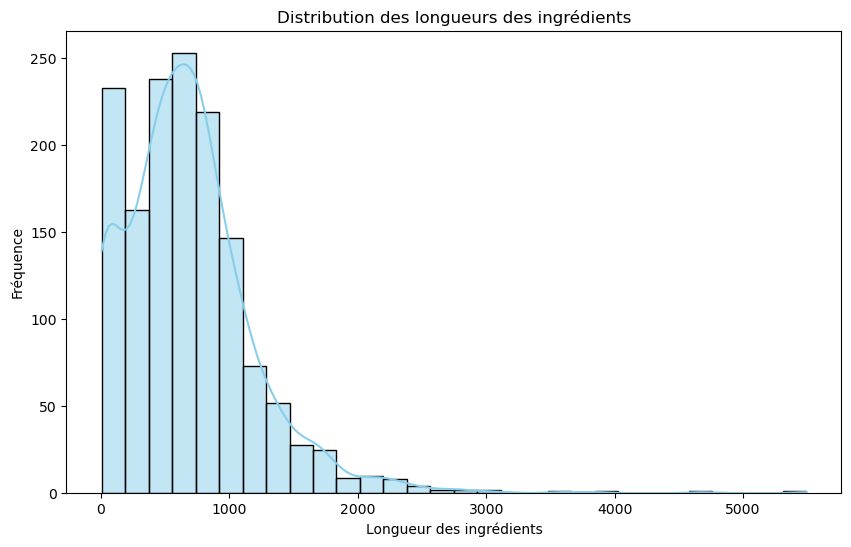

2025-05-04 00:16:54.955 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 00:16:54.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,Ingredients_length
count,1472.000000
mean,680.799592
std,522.356410
min,5.000000
25%,342.250000
50%,627.000000
75%,913.000000
max,5491.000000


In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

# Charger les données
file_path = "/Users/macbook/Desktop/datadata/final_cosmetics_data.csv"  # Remplace par ton chemin
df = pd.read_csv(file_path)

# Aperçu des premières lignes des données
df.head()

# Vérifier les types de données et les valeurs manquantes
df_info = df.info()
print(df_info)

# Afficher les valeurs manquantes pour chaque colonne
missing_data = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_data)

# Afficher la distribution des propriétés
st.subheader("Distribution des propriétés")

# Créer un graphique des catégories (barplot)
df_categories = df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
                    "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]].sum()
sns.barplot(x=df_categories.index, y=df_categories.values, palette="Set2")
plt.title("Distribution des propriétés des produits cosmétiques")
plt.xlabel("Propriétés")
plt.ylabel("Nombre de produits")
plt.show()

# Visualisation de la corrélation entre les propriétés avec un heatmap
corr = df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
           "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des propriétés")
plt.show()

# Afficher la distribution de certaines caractéristiques comme "Ingredients" (si tu veux examiner le texte)
df['Ingredients_length'] = df['Ingredients'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingredients_length'], kde=True, color="skyblue", bins=30)
plt.title("Distribution des longueurs des ingrédients")
plt.xlabel("Longueur des ingrédients")
plt.ylabel("Fréquence")
plt.show()

# Affichage des statistiques descriptives
st.subheader("Statistiques descriptives")
df.describe()

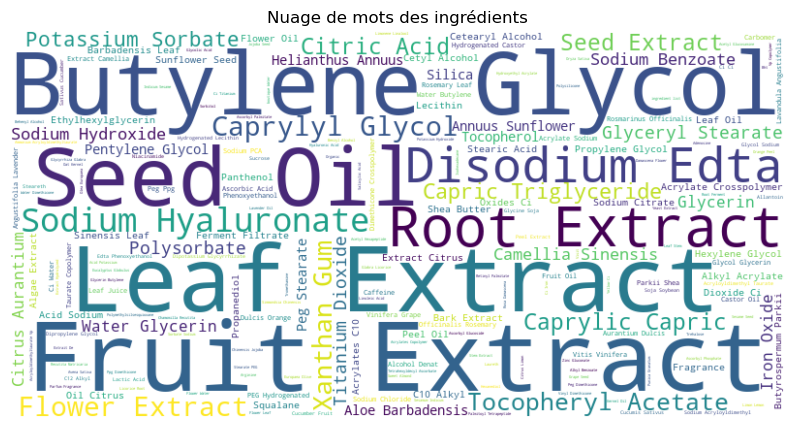

In [2]:
from wordcloud import WordCloud

# Fusionner tous les ingrédients en une seule chaîne de caractères
text = ' '.join(df['Ingredients'].dropna())

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Affichage du nuage de mots
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des ingrédients")
plt.show()

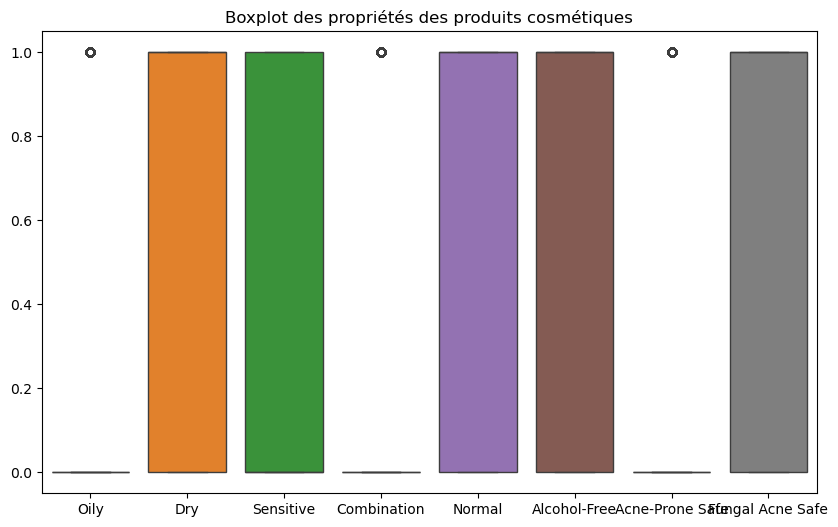

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
                     "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]])
plt.title("Boxplot des propriétés des produits cosmétiques")
plt.show()

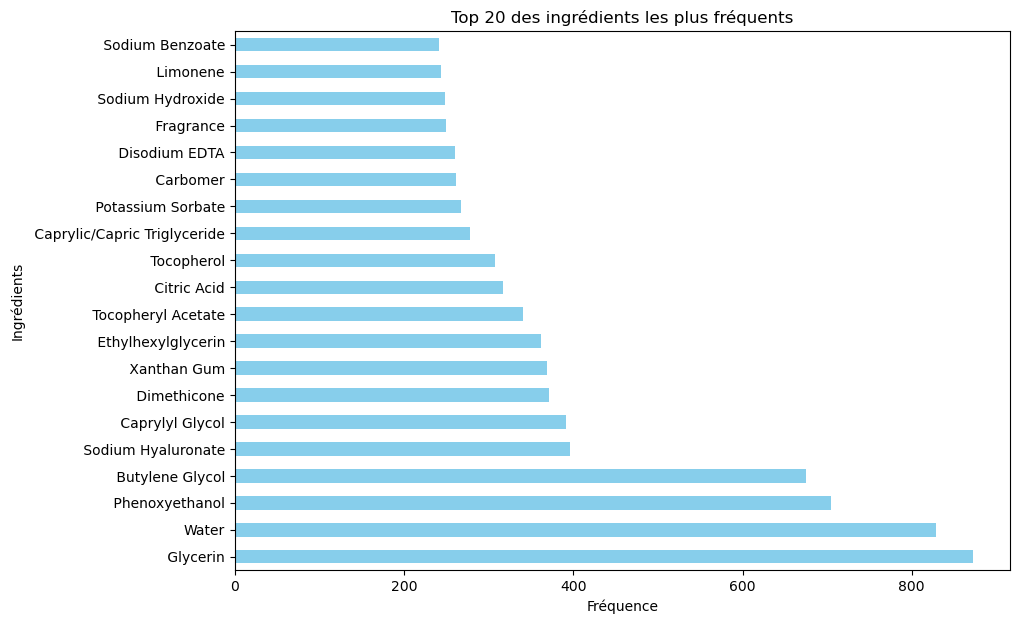

In [4]:
ingredient_count = df['Ingredients'].str.split(',').explode().value_counts().head(20)
ingredient_count.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.title("Top 20 des ingrédients les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Ingrédients")
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)  # 500 features max pour limiter la complexité
X_tfidf = vectorizer.fit_transform(df["Ingredients"])

# Vérification de la taille du résultat
print(X_tfidf.shape)  # (1472, 500)

(1472, 500)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df[["Oily", "Dry", "Sensitive", "Combination", "Normal",
                                                                  "Alcohol-Free", "Acne-Prone Safe", "Fungal Acne Safe"]],
                                                    test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1177, 500), Test: (295, 500)


In [7]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    "SVM": MultiOutputClassifier(SVC(probability=True)),
    "KNN": MultiOutputClassifier(KNeighborsClassifier(n_neighbors=5)),
    "Logistic Regression": MultiOutputClassifier(LogisticRegression()),
    "XGBoost": MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
}

# Entraînement de tous les modèles
for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    model.fit(X_train, y_train)
    print(f"{name} entraîné avec succès !")

Entraînement du modèle Random Forest...
Random Forest entraîné avec succès !
Entraînement du modèle SVM...
SVM entraîné avec succès !
Entraînement du modèle KNN...
KNN entraîné avec succès !
Entraînement du modèle Logistic Regression...
Logistic Regression entraîné avec succès !
Entraînement du modèle XGBoost...


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:19:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:19:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [00:19:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGBoost entraîné avec succès !


In [8]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== Évaluation du modèle : {name} ===")
    print(classification_report(y_test, y_pred))


=== Évaluation du modèle : Random Forest ===
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.92      0.98      0.95       216
           2       1.00      0.92      0.96       134
           3       1.00      0.91      0.95        53
           4       0.95      0.99      0.97       216
           5       0.96      1.00      0.98       157
           6       1.00      0.90      0.95        70
           7       0.93      0.98      0.95       193

   micro avg       0.95      0.97      0.96      1097
   macro avg       0.97      0.95      0.96      1097
weighted avg       0.96      0.97      0.96      1097
 samples avg       0.95      0.97      0.95      1097



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Évaluation du modèle : SVM ===
              precision    recall  f1-score   support

           0       0.96      0.40      0.56        58
           1       0.89      0.99      0.93       216
           2       0.96      0.80      0.87       134
           3       1.00      0.55      0.71        53
           4       0.92      0.98      0.95       216
           5       0.86      0.98      0.92       157
           6       1.00      0.60      0.75        70
           7       0.84      0.99      0.91       193

   micro avg       0.90      0.89      0.89      1097
   macro avg       0.93      0.79      0.82      1097
weighted avg       0.91      0.89      0.88      1097
 samples avg       0.89      0.90      0.89      1097



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Évaluation du modèle : KNN ===
              precision    recall  f1-score   support

           0       0.60      0.16      0.25        58
           1       0.90      0.52      0.66       216
           2       0.72      0.40      0.52       134
           3       0.77      0.19      0.30        53
           4       0.92      0.51      0.66       216
           5       0.62      0.92      0.75       157
           6       0.74      0.20      0.31        70
           7       0.74      0.97      0.84       193

   micro avg       0.75      0.59      0.66      1097
   macro avg       0.75      0.48      0.54      1097
weighted avg       0.78      0.59      0.62      1097
 samples avg       0.74      0.64      0.65      1097


=== Évaluation du modèle : Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.21      0.34        58
           1       0.88      0.99      0.93       216
           2       0.87      0.81      0.84 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-pac

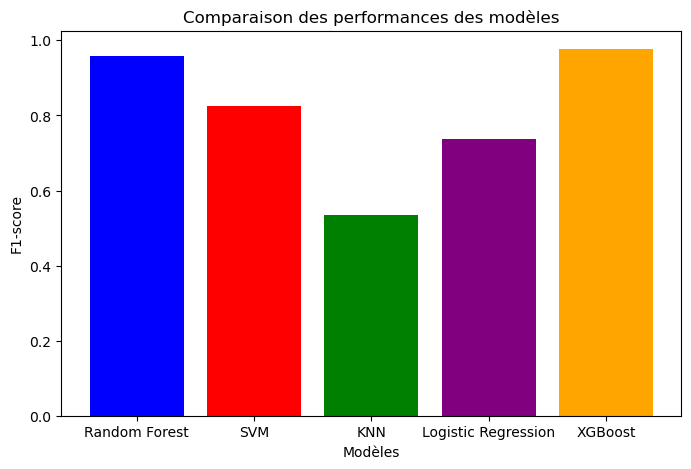

In [9]:
import matplotlib.pyplot as plt

model_names = []
f1_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"]
    model_names.append(name)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.bar(model_names, f1_scores, color=["blue", "red", "green", "purple", "orange"])
plt.xlabel("Modèles")
plt.ylabel("F1-score")
plt.title("Comparaison des performances des modèles")
plt.show()

In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
import pickle

# Sauvegarde du modèle
with open("cosmetics_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Sauvegarde du vectorizer TF-IDF
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)